In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score

In [12]:
df = pd.read_csv('/content/drive/MyDrive/datasetTema2IA2023/dataset.csv')

In [13]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [14]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [15]:
for col in ['OperatingSystems', 'Browser', 'Region', 'TrafficType']:
    df[col] = df[col].astype('category')

In [16]:
df.dtypes

,0
Administrative,int64
Administrative_Duration,float64
Informational,int64
Informational_Duration,float64
ProductRelated,int64
ProductRelated_Duration,float64
BounceRates,float64
ExitRates,float64
PageValues,float64
SpecialDay,float64


In [17]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [18]:
df.shape

(12330, 18)

In [19]:
atribute_numerice = df.select_dtypes(exclude=['object', 'bool', 'category']).columns.tolist()
atribute_numerice

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay']

In [20]:
atribute_categorice = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
atribute_categorice

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

#3.1. Explorarea Datelor (Exploratory Data Analysis)

##2 . Attribute Visualization


###A.

####Distribution for Numerical Attributes

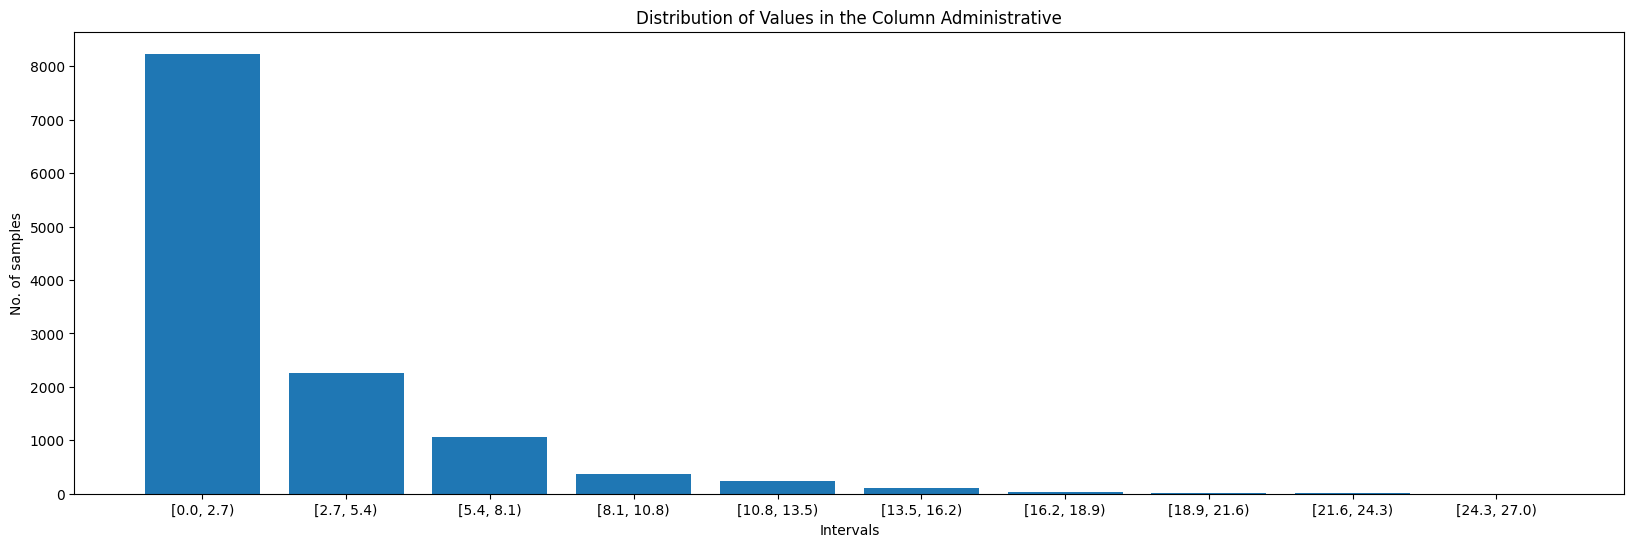

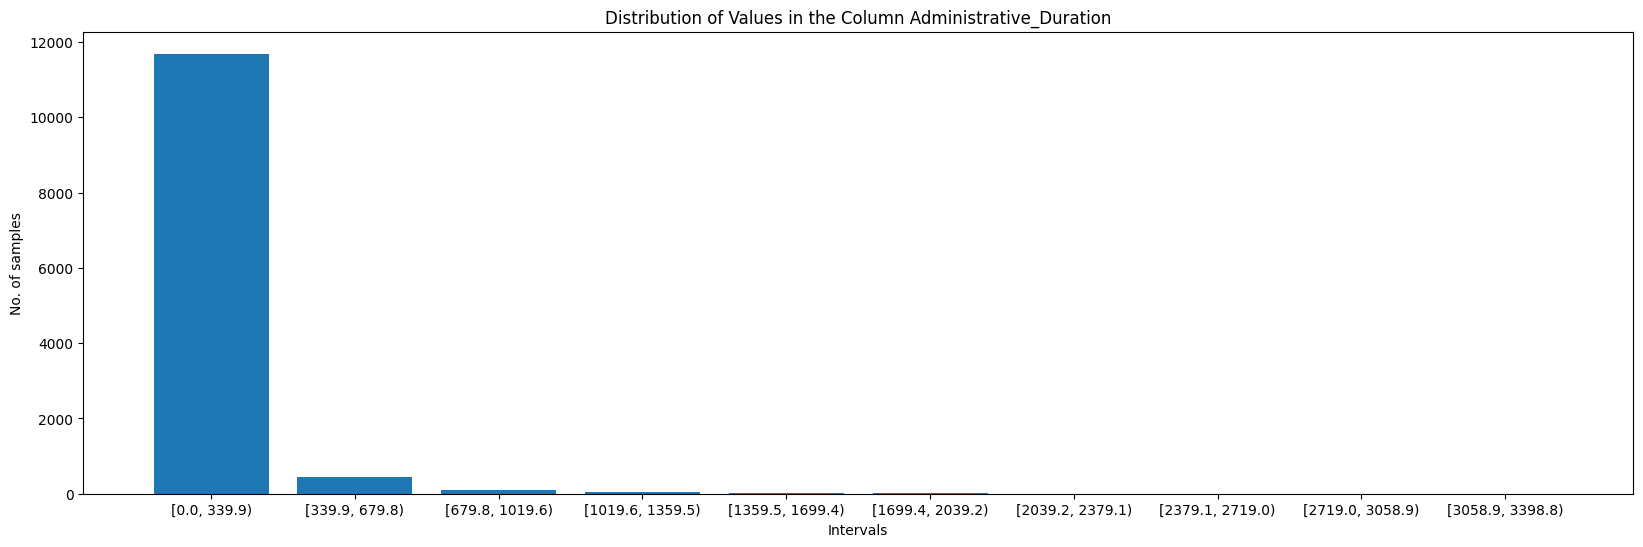

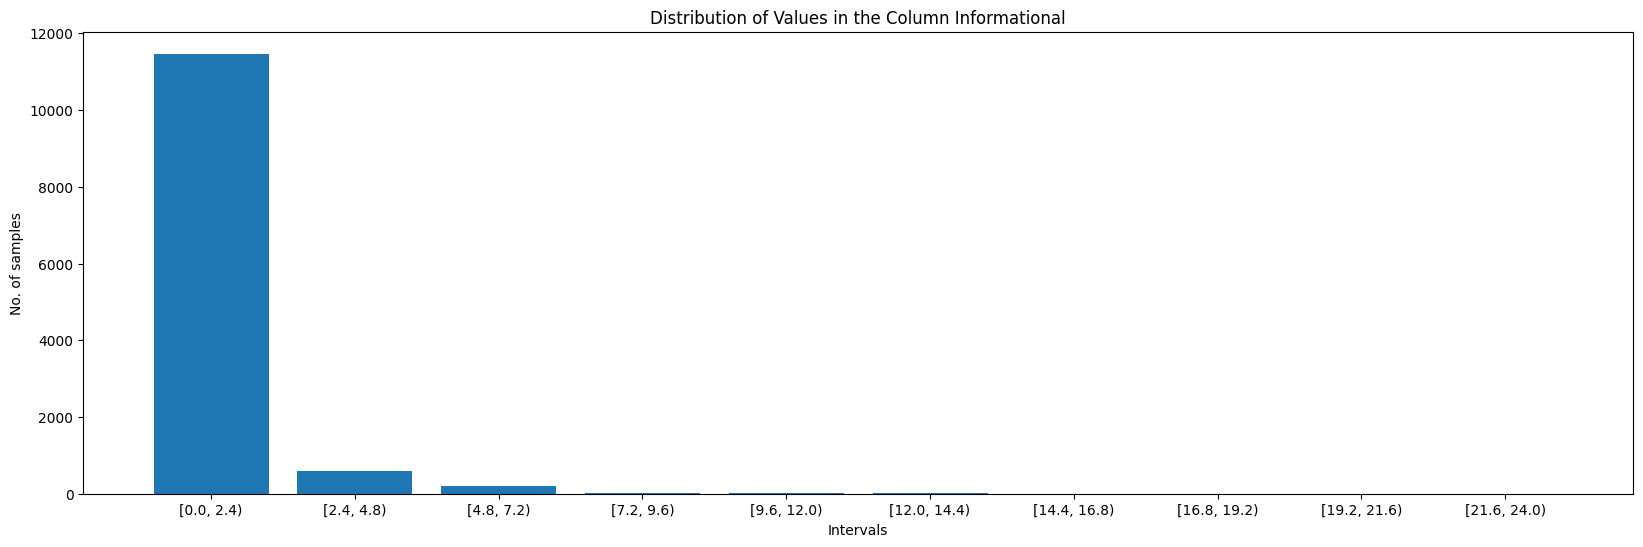

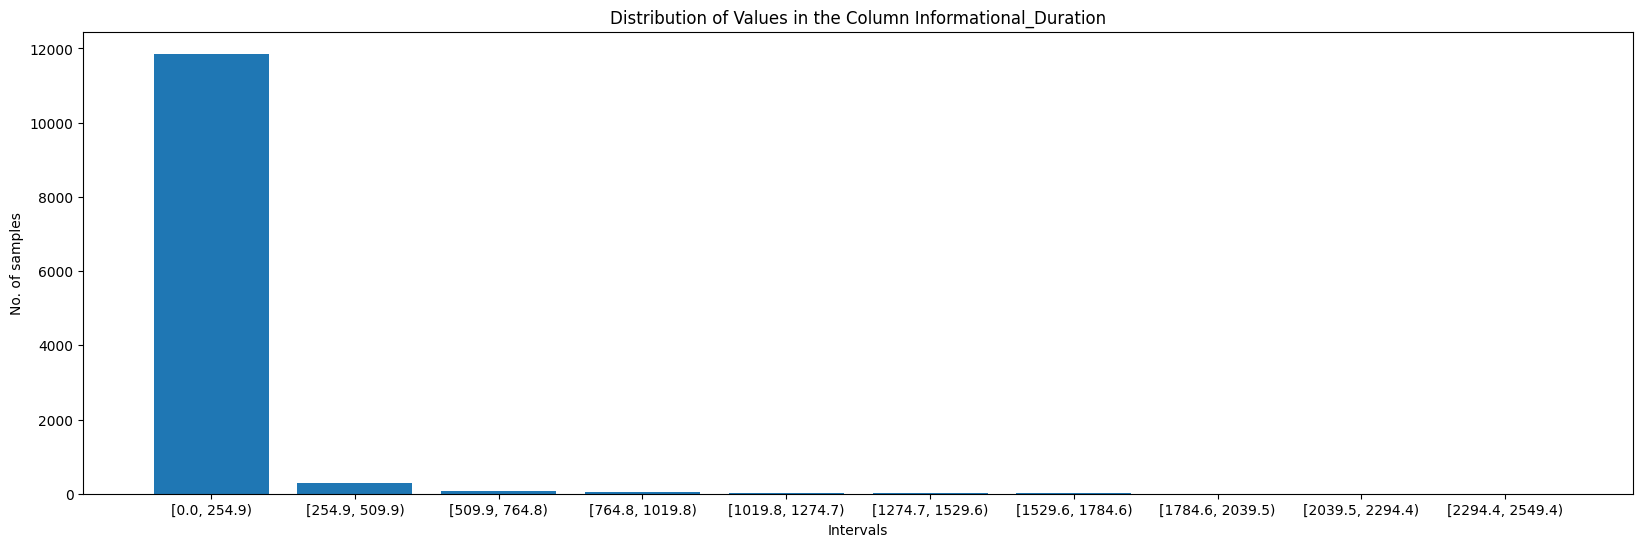

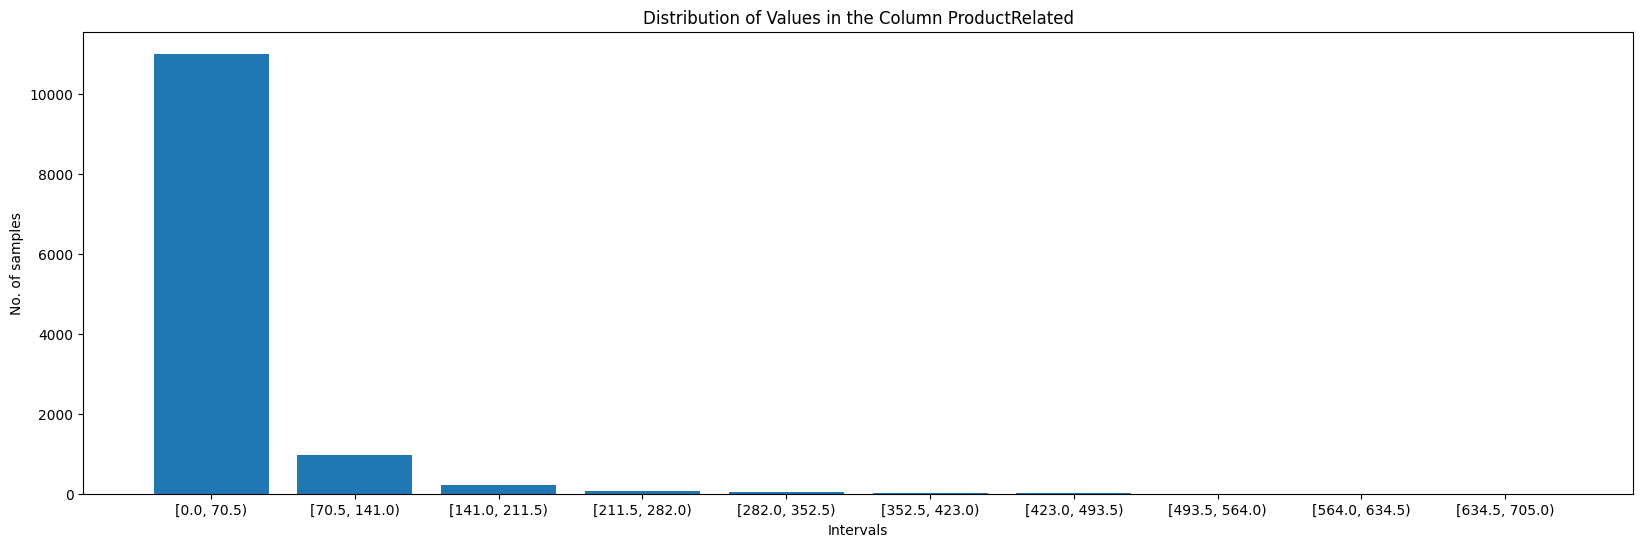

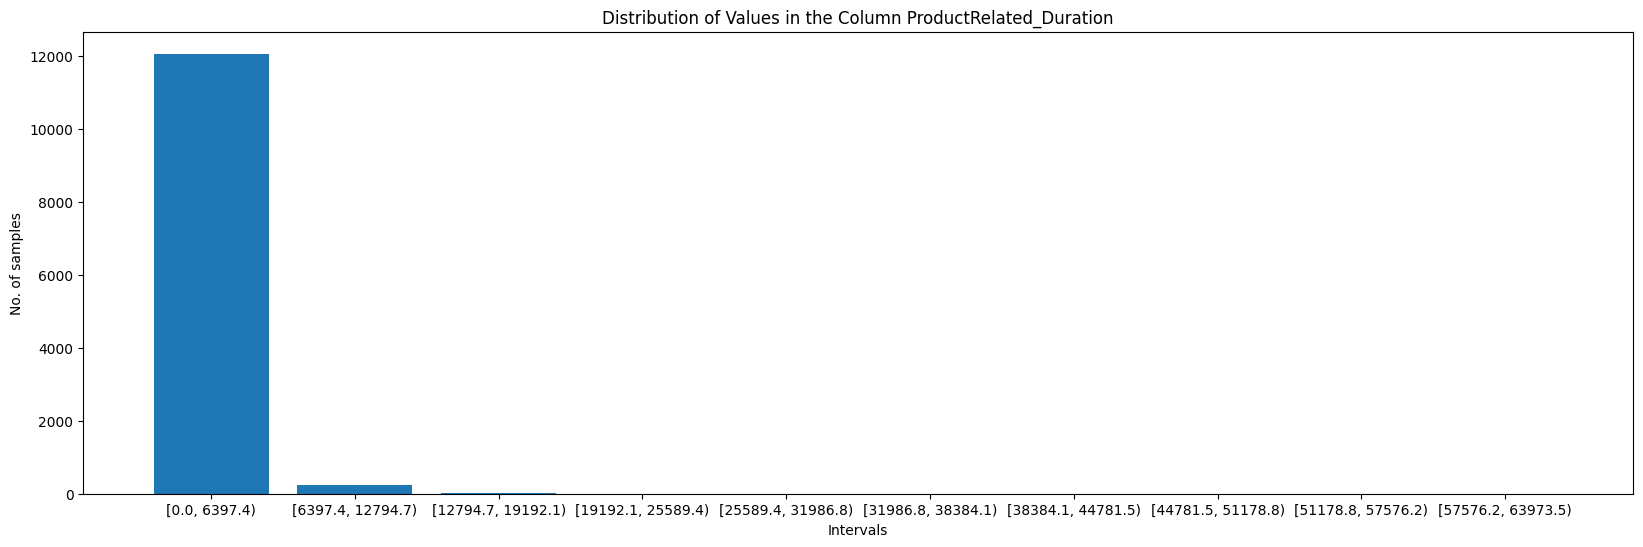

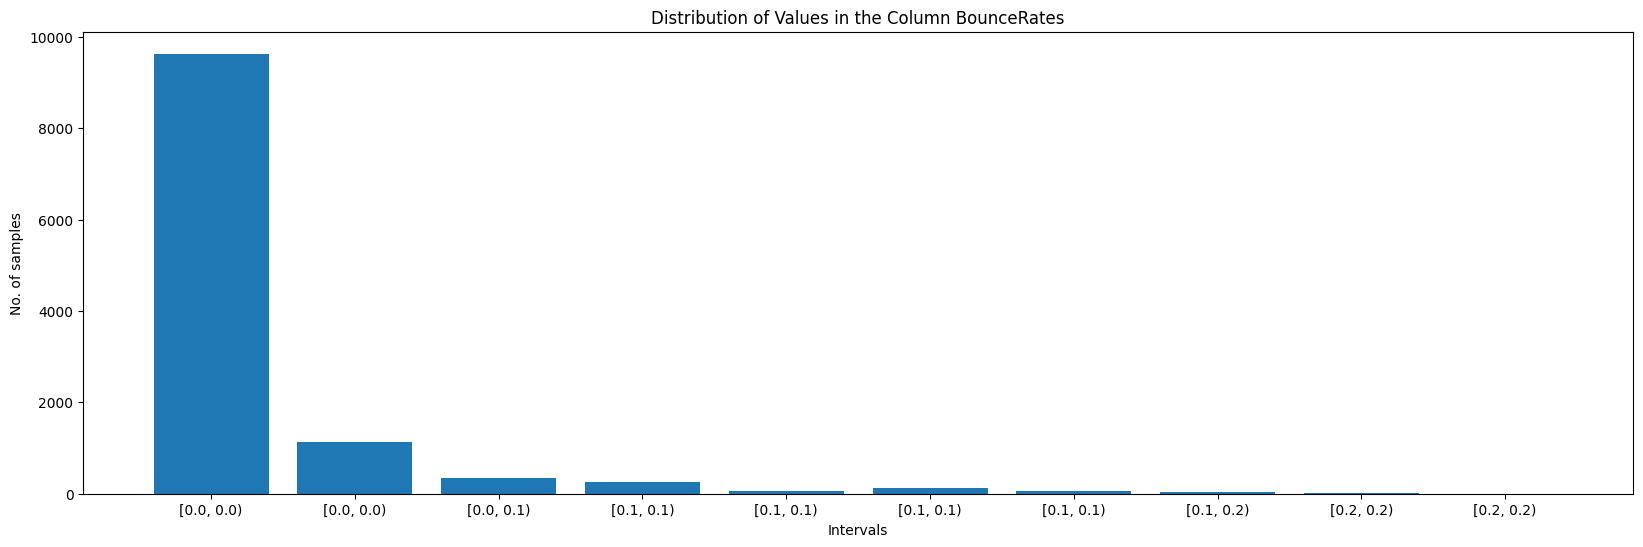

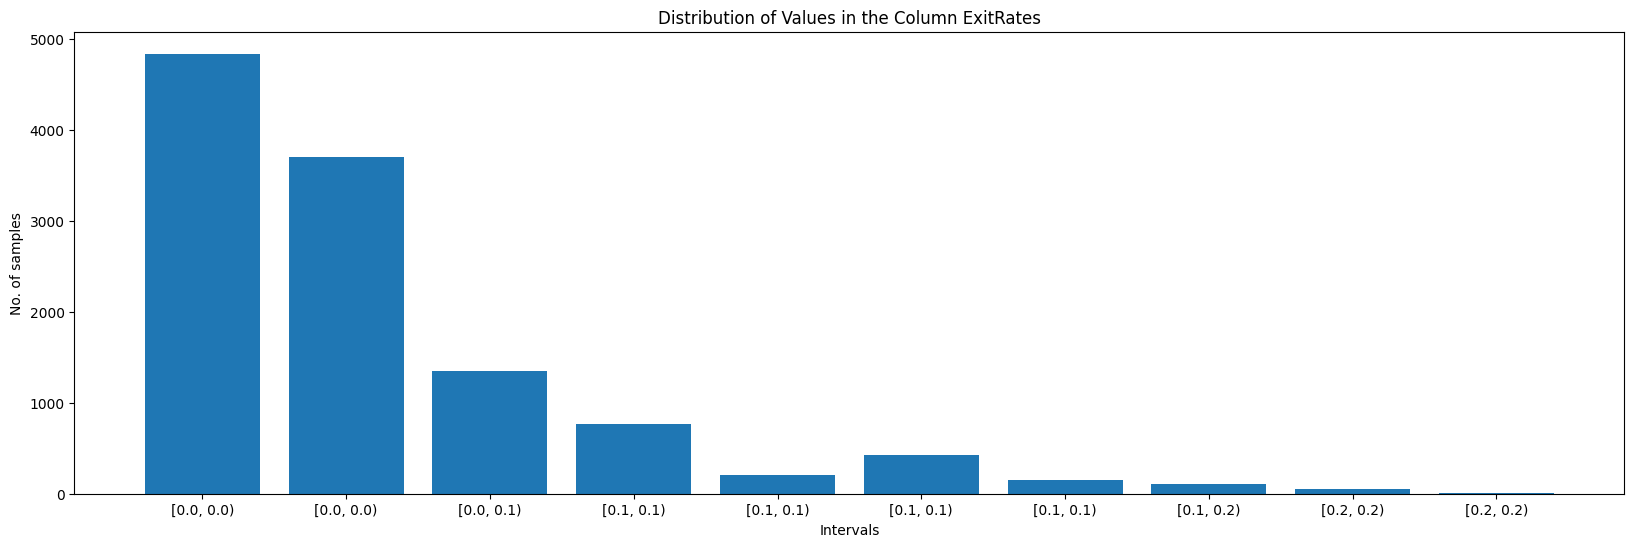

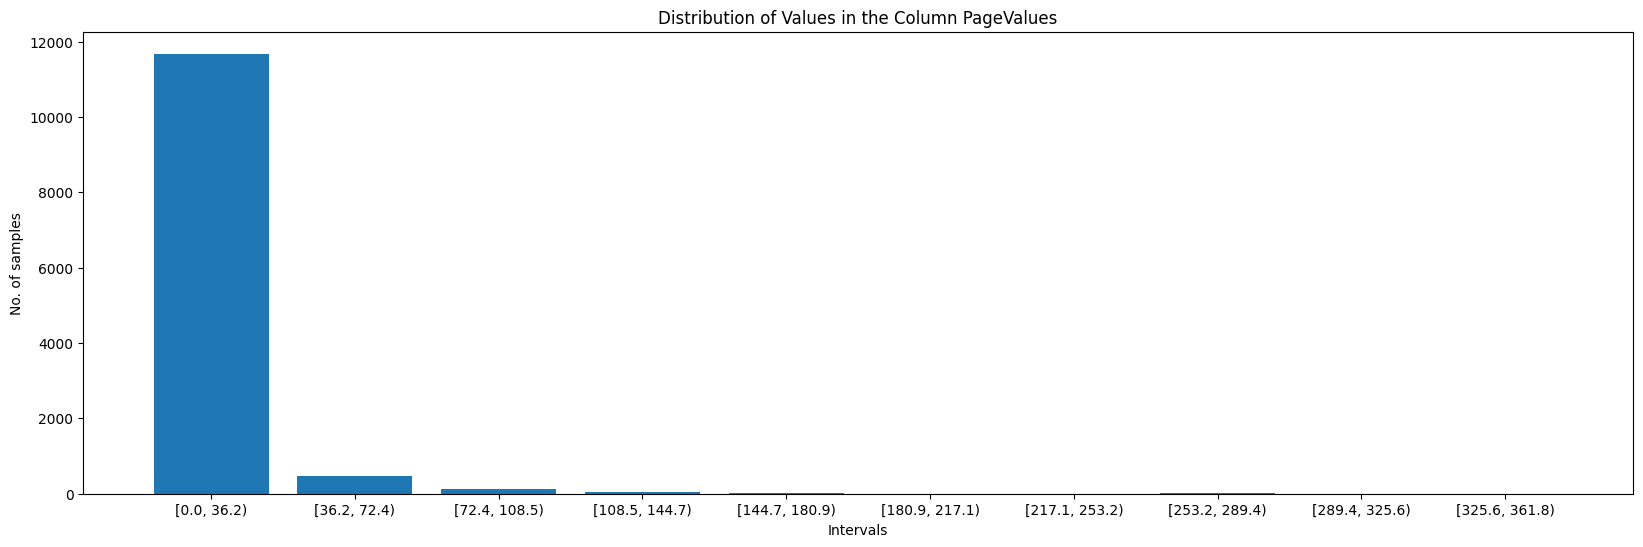

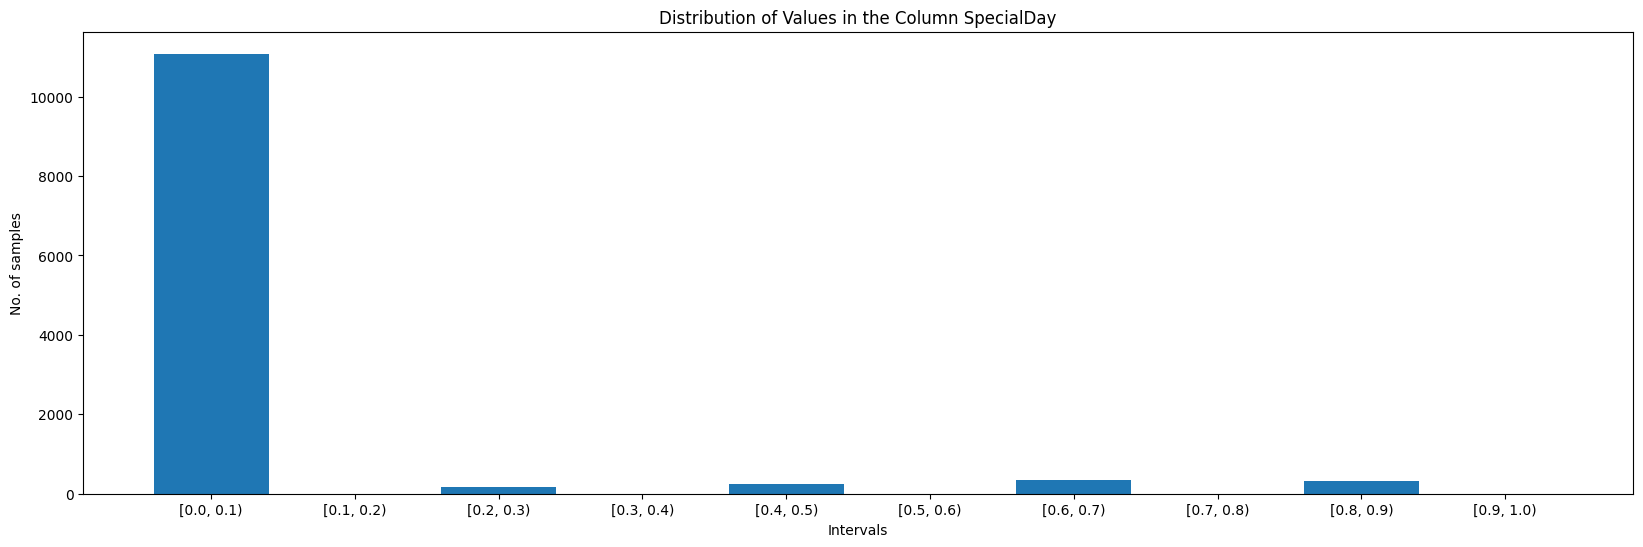

In [21]:
for atribut in atribute_numerice:
    min_val = df[atribut].min()
    max_val = df[atribut].max()

    # Calcul intervale
    intervals = [(min_val + i / 10 * (max_val - min_val), min_val + (i + 1) / 10 * (max_val - min_val)) for i in range(10)]

    # Calculează numărul de valori în fiecare interval
    values_in_intervals = []
    for interval in intervals:
        count = ((df[atribut] >= interval[0]) & (df[atribut] < interval[1])).sum()
        values_in_intervals.append(count)

    plt.figure(figsize=(20, 6))
    plt.bar(range(1, 11), values_in_intervals, tick_label=[f"[{interval[0]:.1f}, {interval[1]:.1f})" for interval in intervals])
    plt.xlabel('Intervals')
    plt.ylabel('No. of samples')
    plt.title(f'Distribution of Values in the Column {atribut}')
    plt.show()

####Distribution for Categorical Attributes

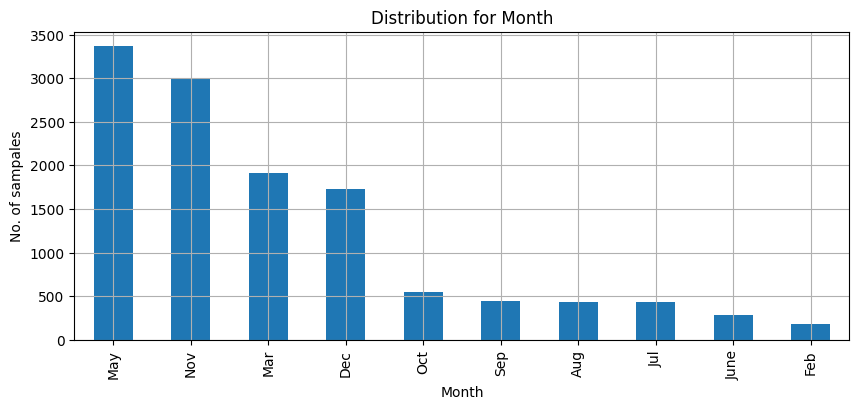

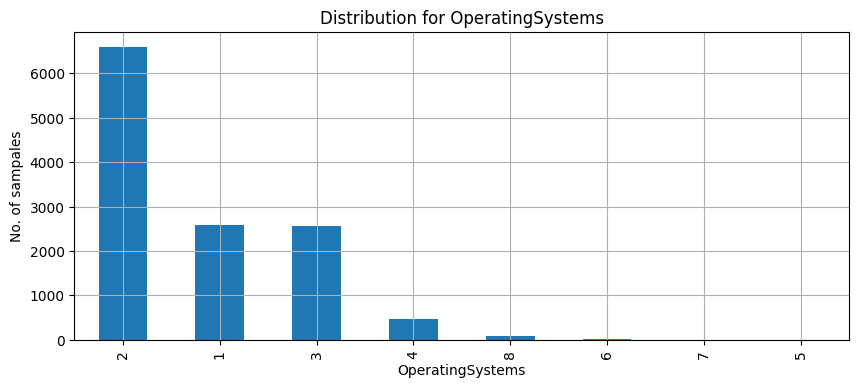

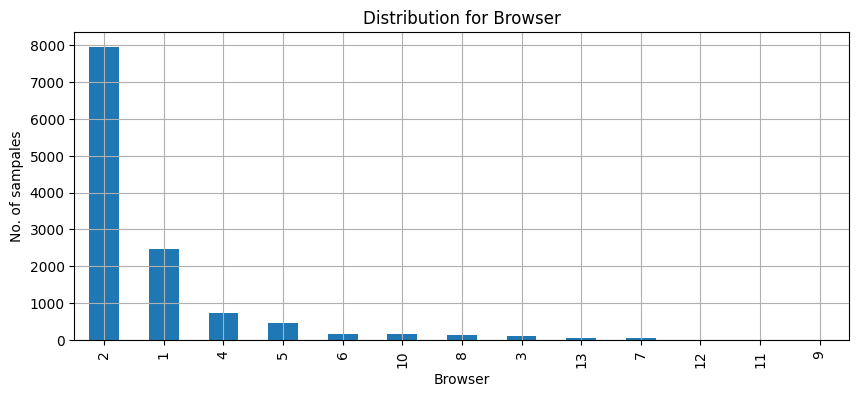

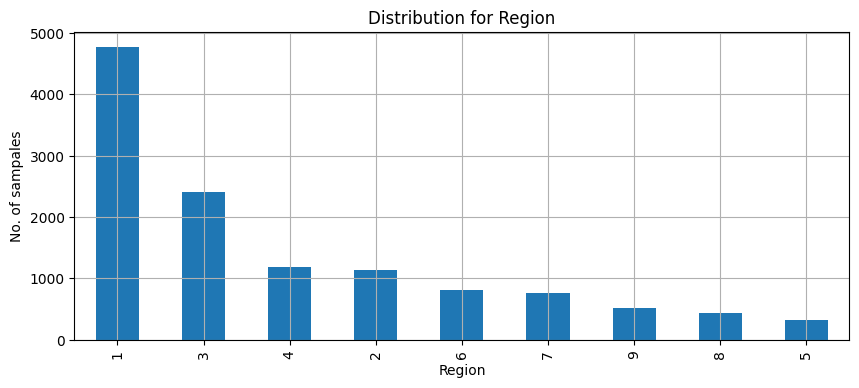

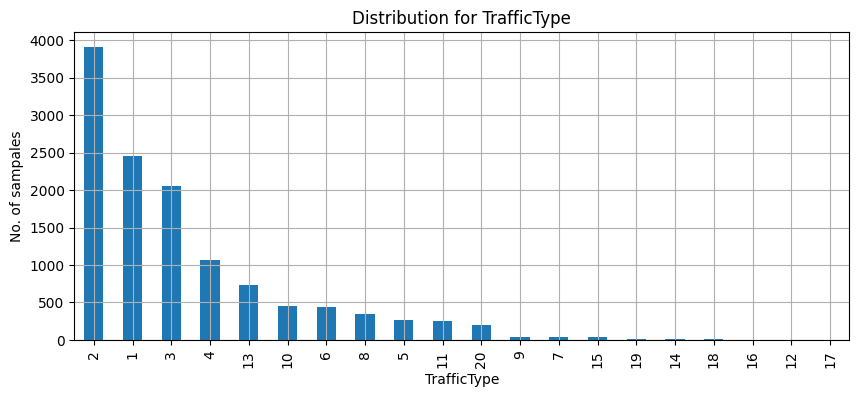

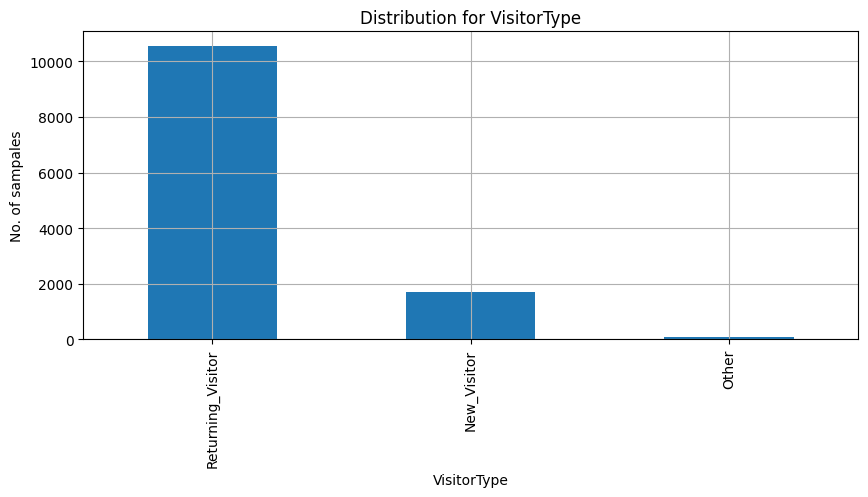

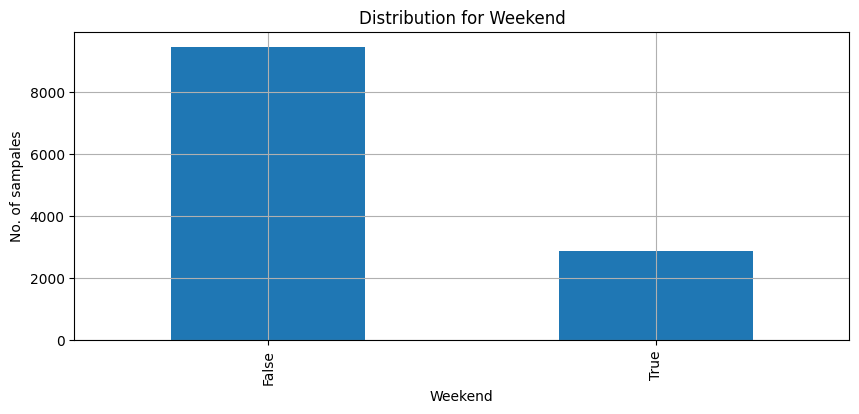

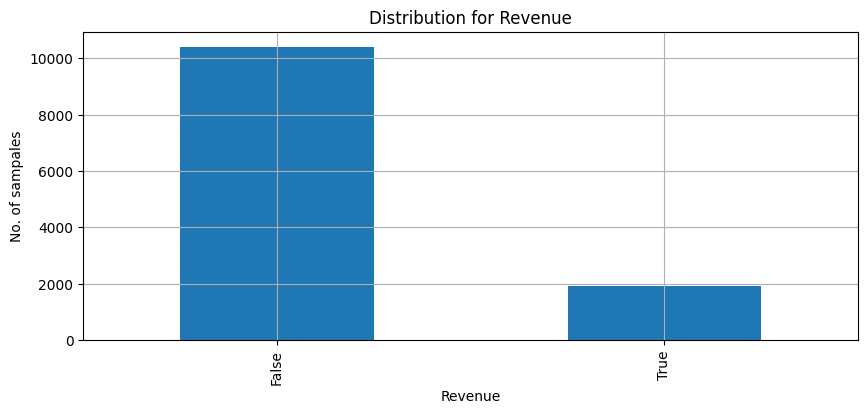

In [22]:
for atribut in atribute_categorice:
    plt.figure(figsize=(10, 4))
    df[atribut].value_counts().plot(kind='bar')
    plt.title(f'Distribution for {atribut}')
    plt.xlabel(atribut)
    plt.ylabel('No. of sampales')
    plt.grid(True)
    plt.show()

###B.

####Point-Biserial Correlation for numerical attributes

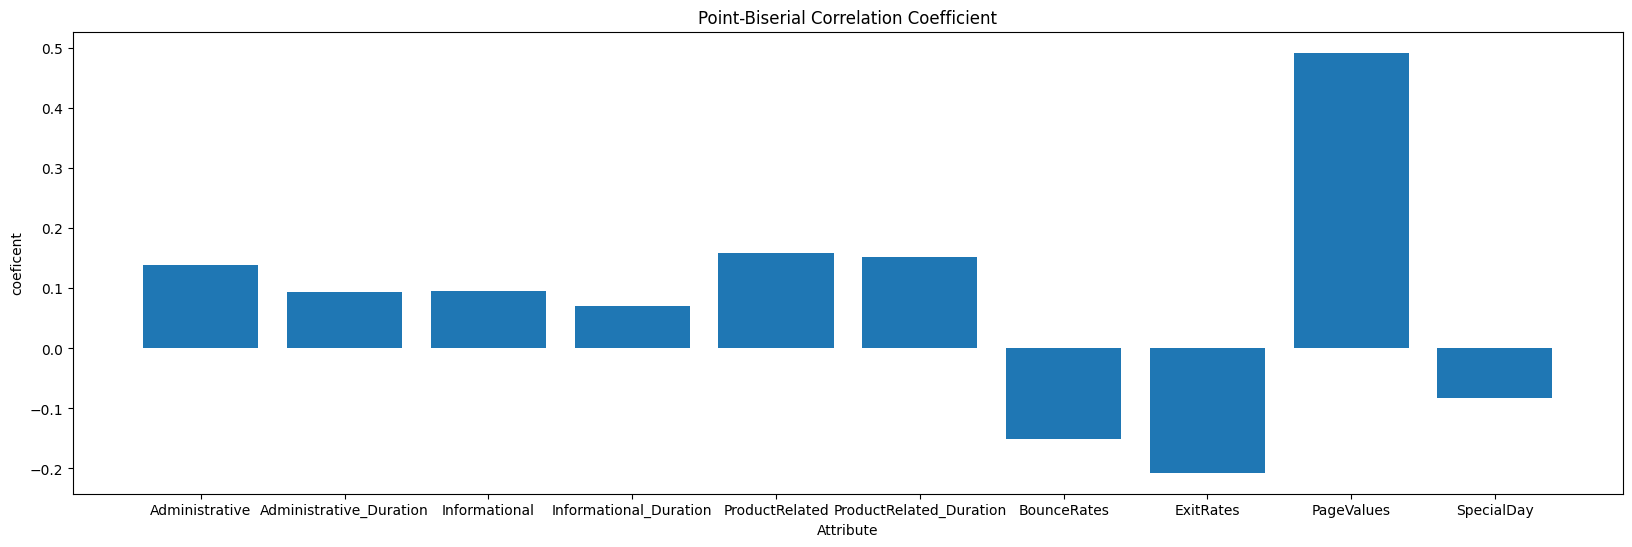

In [23]:
corr_list = []
y = df['Revenue']

for atribut in atribute_numerice:
    x=df[atribut]
    coefficient, p_value = pointbiserialr(list(x), list(y))
    corr_list.append({'Attribute names': atribut, 'Coefficient': coefficient, 'P-Value': p_value})

correlation_results = pd.DataFrame(corr_list)

# Filtrarea atributelor cu p-value <= 0.05
significant_attributes = correlation_results[correlation_results['P-Value'] <= 0.05]

if not significant_attributes.empty:
    plt.figure(figsize=(20, 6))
    plt.bar(significant_attributes['Attribute names'], significant_attributes['Coefficient'])
    plt.xlabel('Attribute')
    plt.ylabel('coeficent')
    plt.title('Point-Biserial Correlation Coefficient')
    plt.show()
else:
    print("There are no significant attributes.")

Among all attributes, PageValues has the strongest correlation with Revenue, with a coefficient close to 0.5."


In [24]:
correlation_results

,Attribute names,Coefficient,P-Value
0,Administrative,0.138917,3.519760e-54
1,Administrative_Duration,0.093587,2.146514e-25
2,Informational,0.095200,3.174034e-26
3,Informational_Duration,0.070345,5.282871e-15
4,ProductRelated,0.158538,3.241187e-70
5,ProductRelated_Duration,0.152373,6.115338e-65
6,BounceRates,-0.150673,1.594198e-63
7,ExitRates,-0.207071,1.662654e-119
8,PageValues,0.492569,0.000000e+00
9,SpecialDay,-0.082305,5.498934e-20


####Testul Pearson Chi-squared

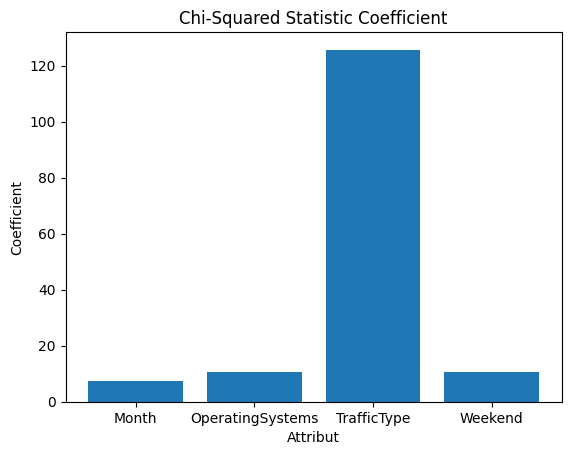

In [25]:
corr_list = []
for atribut in atribute_categorice[:-1]:
    chisqt = pd.crosstab(df[atribut], df.Revenue, margins=True)
    value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
    statistic, pvalue = chi2_contingency(value)[0:2]

    corr_list.append({'Attribute': atribut, 'Coefficient': statistic, 'P-value': pvalue})

chi_squared_results = pd.DataFrame(corr_list)

significant_attributes = chi_squared_results[chi_squared_results['P-value'] <= 0.05]

plt.bar(significant_attributes['Attribute'], significant_attributes['Coefficient'])
plt.xlabel('Attribut')
plt.ylabel('Coefficient')
plt.title('Chi-Squared Statistic Coefficient')
plt.show()

The attribute TrafficType has the highest coefficient, indicating that it has the greatest dependence on the target variable.

In [26]:
chi_squared_results

,Attribute,Coefficient,P-value
0,Month,7.536145,2.309653e-02
1,OperatingSystems,10.738903,4.656686e-03
2,Browser,0.419967,8.105977e-01
3,Region,0.118972,9.422488e-01
4,TrafficType,125.720307,5.013975e-28
5,VisitorType,1.616381,4.456638e-01
6,Weekend,10.581835,5.037136e-03


#3.2. Training and Evaluating Prediction Algorithms

##3.2.1. Logistic Regression

### Implementation using the scikit-learn library




In [27]:

runs = 11 # tre sa fie 11 pt 10 impartiri diferite

 # aplicare LabelEncoder pe var. categorige pt transforamre in format numeric
results_list = []
le = LabelEncoder()
for atribut in atribute_categorice:
    df[atribut] = le.fit_transform(df[atribut])

X = df.drop("Revenue", axis=1)
y = df["Revenue"]

# functii scalare
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}



# metrici evaluare
metrics = ['precision', 'recall', 'f1']

for split in range(1, runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=split)

    for scaler_name, scaler in scalers.items():
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = LogisticRegression(max_iter=1000, random_state=42)
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)

        score1 = None
        score2 = None
        score3 = None
        for metric in metrics:
            score = None
            if metric == 'precision':
                score1 = precision_score(y_test, y_pred)
            elif metric == 'recall':
                score2 = precision_score(y_test, y_pred)
            elif metric == 'f1':
                score3 = f1_score(y_test, y_pred)
        results_list.append({
                    'Algorithm': 'Logistic Regression',
                    'Scaler': scaler_name,
                    'Split': split,
                    'Precision': score1,
                    'Recall': score2,
                    'F1': score3
                })


In [28]:
logistic_df = pd.DataFrame(results_list)

In [29]:
logistic_df

,Algorithm,Scaler,Split,Precision,Recall,F1
0,Logistic Regression,MinMaxScaler,1,0.748092,0.748092,0.406639
1,Logistic Regression,StandardScaler,1,0.723757,0.723757,0.492481
2,Logistic Regression,RobustScaler,1,0.723757,0.723757,0.492481
3,Logistic Regression,MinMaxScaler,2,0.689394,0.689394,0.377593
4,Logistic Regression,StandardScaler,2,0.671958,0.671958,0.471243
5,Logistic Regression,RobustScaler,2,0.671958,0.671958,0.471243
6,Logistic Regression,MinMaxScaler,3,0.744186,0.744186,0.391039
7,Logistic Regression,StandardScaler,3,0.743169,0.743169,0.499083
8,Logistic Regression,RobustScaler,3,0.743169,0.743169,0.499083
9,Logistic Regression,MinMaxScaler,4,0.753968,0.753968,0.383838


In [30]:
def logistic_mean_var(scaler, data_frame):
    res_df = data_frame[data_frame['Scaler'] == scaler]
    res_df = res_df[['Precision', 'Recall', 'F1']]
    var_measure = res_df.var(axis=0)
    mean_measure = res_df.mean()
    var_df = pd.DataFrame({'Precision varience': [var_measure['Precision']],
                              'Recall varience': [var_measure['Recall']],
                              'F1 varience': [var_measure['F1']]})
    mean_df = pd.DataFrame({'Precision mean': [mean_measure['Precision']],
                              'Recall mean': [mean_measure['Recall']],
                              'F1 mean': [mean_measure['F1']]})
    res_df = pd.concat([mean_df, var_df], axis=1)
    res_df.insert(0, 'Algorithm', 'Logistic Regresion')
    res_df.insert(1, 'Scaler', scaler)
    return res_df


In [31]:
sc1 = logistic_mean_var('MinMaxScaler', logistic_df)
sc2 = logistic_mean_var('StandardScaler', logistic_df)
sc3 = logistic_mean_var('RobustScaler', logistic_df)
logistic_mean_var_df = pd.concat([sc1, sc2, sc3], ignore_index=True)
logistic_mean_var_df

,Algorithm,Scaler,Precision mean,Recall mean,F1 mean,Precision varience,Recall varience,F1 varience
0,Logistic Regresion,MinMaxScaler,0.752210,0.752210,0.393319,0.000994,0.000994,0.000468
1,Logistic Regresion,StandardScaler,0.729599,0.729599,0.480662,0.000653,0.000653,0.000598
2,Logistic Regresion,RobustScaler,0.729221,0.729221,0.480575,0.000635,0.000635,0.000592


In [32]:

def bold_f1(columns, target_df):
    max_values = []
    for col in columns:
        max_values.append(target_df[col].max())

    target_df = target_df.style.apply(lambda x: ["font-weight: bold" if v in max_values else "" for v in x], subset=columns)
    return target_df

In [33]:
df_list = []
for scaler in scalers.keys():
    df_list.append(logistic_mean_var(scaler, logistic_df))
logistic_mean_var_df = pd.concat(df_list, ignore_index=True)

In [34]:
logistic_mean_var_bold_df = bold_f1(['F1 mean', 'F1 varience'], logistic_mean_var_df)
logistic_mean_var_bold_df

,Algorithm,Scaler,Precision mean,Recall mean,F1 mean,Precision varience,Recall varience,F1 varience
0,Logistic Regresion,MinMaxScaler,0.752210,0.752210,0.393319,0.000994,0.000994,0.000468
1,Logistic Regresion,StandardScaler,0.729599,0.729599,0.480662,0.000653,0.000653,0.000598
2,Logistic Regresion,RobustScaler,0.729221,0.729221,0.480575,0.000635,0.000635,0.000592


##3.2.2. Decision Tree

### Implementation using the scikit-learn library

In [35]:

results_list = []
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'NoScaler': None  # Pentru cazul în care nu se aplică scalare
}

metrics = ['precision', 'recall', 'f1']

for max_depth in range(4, 6):
    for scaler_name, scaler in scalers.items():
        for split in range(1, runs):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=split)

            if scaler is not None:
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)
            else:
                X_train_scaled = X_train
                X_test_scaled = X_test

            model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
            model.fit(X_train_scaled, y_train)

            y_pred = model.predict(X_test_scaled)

            score1 = None
            score2 = None
            score3 = None
            for metric in metrics:
                score = None
                if metric == 'precision':
                    score1 = precision_score(y_test, y_pred)
                elif metric == 'recall':
                    score2 = recall_score(y_test, y_pred)
                elif metric == 'f1':
                    score3 = f1_score(y_test, y_pred)
            results_list.append({
                        'Algorithm': 'Decision Tree',
                        'Scaler': scaler_name,
                        'Split': split,
                        'Max depth': max_depth,
                        'Precision': score1,
                        'Recall': score2,
                        'F1': score3
                    })


In [36]:
tree_df = pd.DataFrame(results_list)
tree_df

,Algorithm,Scaler,Split,Max depth,Precision,Recall,F1
0,Decision Tree,MinMaxScaler,1,4,0.695946,0.586895,0.636785
1,Decision Tree,MinMaxScaler,2,4,0.721973,0.460000,0.561955
2,Decision Tree,MinMaxScaler,3,4,0.713333,0.591160,0.646526
3,Decision Tree,MinMaxScaler,4,4,0.662921,0.639566,0.651034
4,Decision Tree,MinMaxScaler,5,4,0.661631,0.601648,0.630216
...,...,...,...,...,...,...,...
75,Decision Tree,NoScaler,6,5,0.739286,0.522727,0.612426
76,Decision Tree,NoScaler,7,5,0.716463,0.604113,0.655509
77,Decision Tree,NoScaler,8,5,0.736462,0.532637,0.618182
78,Decision Tree,NoScaler,9,5,0.686469,0.550265,0.610866


In [37]:
def tree_mean_var(scaler, max_depth, data_frame):
    res_df = data_frame[(data_frame['Scaler'] == scaler) & (data_frame['Max depth'] == max_depth)]
    res_df = res_df[['Precision', 'Recall', 'F1']]
    var_measure = res_df.var(axis=0)
    mean_measure = res_df.mean()
    var_df = pd.DataFrame({'Precision varience': [var_measure['Precision']],
                              'Recall varience': [var_measure['Recall']],
                              'F1 varience': [var_measure['F1']]})
    mean_df = pd.DataFrame({'Precision mean': [mean_measure['Precision']],
                              'Recall mean': [mean_measure['Recall']],
                              'F1 mean': [mean_measure['F1']]})
    res_df = pd.concat([mean_df, var_df], axis=1)
    res_df.insert(0, 'Algorithm', 'Decision Tree')
    res_df.insert(1, 'Scaler', scaler)
    res_df.insert(2, 'Max depth', max_depth)
    return res_df


In [38]:
df_list = []

In [39]:
for scaler in scalers.keys():
    for max_depth in range(4,6):
        df_list.append(tree_mean_var(scaler, max_depth, tree_df))


In [40]:
tree_mean_var_df = pd.concat(df_list, ignore_index=True)
tree_mean_var_df

,Algorithm,Scaler,Max depth,Precision mean,Recall mean,F1 mean,Precision varience,Recall varience,F1 varience
0,Decision Tree,MinMaxScaler,4,0.69821,0.569865,0.624331,0.001246,0.003713,0.000842
1,Decision Tree,MinMaxScaler,5,0.69083,0.573540,0.624085,0.002343,0.001986,0.000369
2,Decision Tree,StandardScaler,4,0.69821,0.569865,0.624331,0.001246,0.003713,0.000842
3,Decision Tree,StandardScaler,5,0.69083,0.573540,0.624085,0.002343,0.001986,0.000369
4,Decision Tree,RobustScaler,4,0.69821,0.569865,0.624331,0.001246,0.003713,0.000842
5,Decision Tree,RobustScaler,5,0.69083,0.573540,0.624085,0.002343,0.001986,0.000369
6,Decision Tree,NoScaler,4,0.69821,0.569865,0.624331,0.001246,0.003713,0.000842
7,Decision Tree,NoScaler,5,0.69083,0.573540,0.624085,0.002343,0.001986,0.000369


In [41]:
tree_mean_var_bold_df = bold_f1(['F1 mean', 'F1 varience'], tree_mean_var_df)
tree_mean_var_bold_df

,Algorithm,Scaler,Max depth,Precision mean,Recall mean,F1 mean,Precision varience,Recall varience,F1 varience
0,Decision Tree,MinMaxScaler,4,0.698210,0.569865,0.624331,0.001246,0.003713,0.000842
1,Decision Tree,MinMaxScaler,5,0.690830,0.573540,0.624085,0.002343,0.001986,0.000369
2,Decision Tree,StandardScaler,4,0.698210,0.569865,0.624331,0.001246,0.003713,0.000842
3,Decision Tree,StandardScaler,5,0.690830,0.573540,0.624085,0.002343,0.001986,0.000369
4,Decision Tree,RobustScaler,4,0.698210,0.569865,0.624331,0.001246,0.003713,0.000842
5,Decision Tree,RobustScaler,5,0.690830,0.573540,0.624085,0.002343,0.001986,0.000369
6,Decision Tree,NoScaler,4,0.698210,0.569865,0.624331,0.001246,0.003713,0.000842
7,Decision Tree,NoScaler,5,0.690830,0.573540,0.624085,0.002343,0.001986,0.000369


##3.2.3. Comparative Evaluation of Results

In [42]:
logistic_mean_var_bold_df

,Algorithm,Scaler,Precision mean,Recall mean,F1 mean,Precision varience,Recall varience,F1 varience
0,Logistic Regresion,MinMaxScaler,0.752210,0.752210,0.393319,0.000994,0.000994,0.000468
1,Logistic Regresion,StandardScaler,0.729599,0.729599,0.480662,0.000653,0.000653,0.000598
2,Logistic Regresion,RobustScaler,0.729221,0.729221,0.480575,0.000635,0.000635,0.000592


Here, the configuration with the best F1 mean score is the one that used StandardScaler, while the configuration with the best F1 variance score is the one that used RobustScaler.

In [43]:
tree_mean_var_bold_df

,Algorithm,Scaler,Max depth,Precision mean,Recall mean,F1 mean,Precision varience,Recall varience,F1 varience
0,Decision Tree,MinMaxScaler,4,0.698210,0.569865,0.624331,0.001246,0.003713,0.000842
1,Decision Tree,MinMaxScaler,5,0.690830,0.573540,0.624085,0.002343,0.001986,0.000369
2,Decision Tree,StandardScaler,4,0.698210,0.569865,0.624331,0.001246,0.003713,0.000842
3,Decision Tree,StandardScaler,5,0.690830,0.573540,0.624085,0.002343,0.001986,0.000369
4,Decision Tree,RobustScaler,4,0.698210,0.569865,0.624331,0.001246,0.003713,0.000842
5,Decision Tree,RobustScaler,5,0.690830,0.573540,0.624085,0.002343,0.001986,0.000369
6,Decision Tree,NoScaler,4,0.698210,0.569865,0.624331,0.001246,0.003713,0.000842
7,Decision Tree,NoScaler,5,0.690830,0.573540,0.624085,0.002343,0.001986,0.000369


For the decision tree, all scalers give the same scores for a certain depth, which is 4 or 5 in my case. The configuration with the best F1 scores is the one with a maximum depth of 4. A smaller maximum depth can reduce the risk of overfitting, leading to better results.